## Homework

The goal of this homework is to familiarize users with workflow orchestration. 

Start with the orchestrate.py file in the 03-orchestration/3.4 folder
of the course repo: https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/03-orchestration/3.4/orchestrate.py


## Q1. Human-readable name

You’d like to give the first task, `read_data` a nicely formatted name.
How can you specify a task name?

> Hint: look in the docs at https://docs.prefect.io or 
> check out the doc string in a code editor.

- `@task(retries=3, retry_delay_seconds=2, name="Read taxi data")`
- `@task(retries=3, retry_delay_seconds=2, task_name="Read taxi data")`
- `@task(retries=3, retry_delay_seconds=2, task-name="Read taxi data")`
- `@task(retries=3, retry_delay_seconds=2, task_name_function=lambda x: f"Read taxi data")`



In [2]:
! prefect --version

2.10.8


https://docs.prefect.io/2.10.13/tutorial/flow-task-config/

``` python
from prefect import flow, task

@task(
    name="My Example Task", 
    description="An example task for a tutorial."
)
def my_task():
    # do some work
```

## Q2. Cron

Cron is a common scheduling specification for workflows. 

Using the flow in `orchestrate.py`, create a deployment.
Schedule your deployment to run on the third day of every month at 9am UTC.
What’s the cron schedule for that?

- `0 9 3 * *`
- `0 0 9 3 *`
- `9 * 3 0 *`
- `* * 9 3 0`

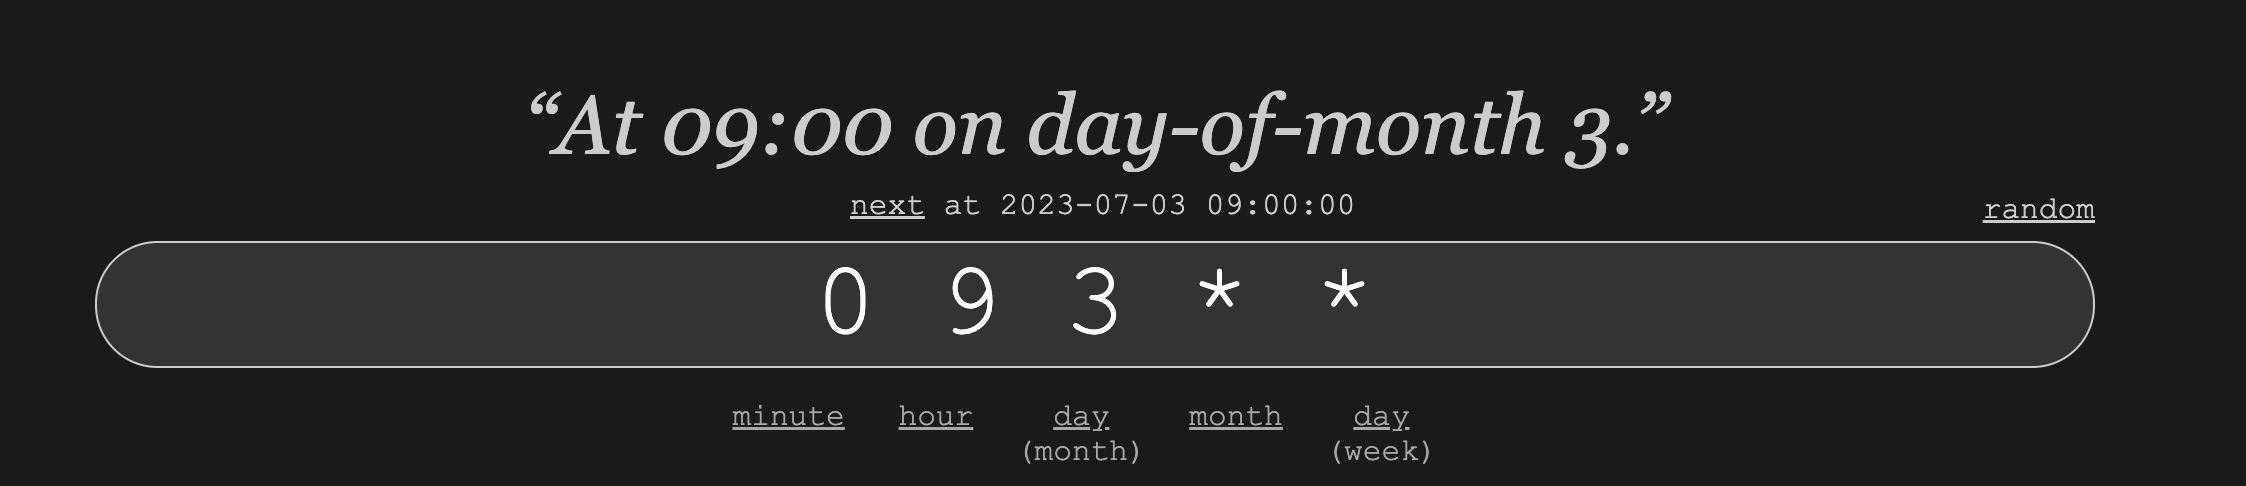

## Q3. RMSE 

Download the January 2023 Green Taxi data and use it for your training data.
Download the February 2023 Green Taxi data and use it for your validation data. 

Make sure you upload the data to GitHub so it is available for your deployment.

Create a custom flow run of your deployment from the UI. Choose Custom
Run for the flow and enter the file path as a string on the JSON tab under Parameters.

Make sure you have a worker running and polling the correct work pool.

View the results in the UI.

What’s the final RMSE to five decimal places?

- 6.67433
- 5.19931
- 8.89443
- 9.12250

In [3]:
! python ./orchestrate.py data/raw/green_tripdata_2023-01.parquet data/raw/green_tripdata_2023-02.parquet

data/raw/green_tripdata_2023-01.parquet
data/raw/green_tripdata_2023-02.parquet
16:57:23.711 | INFO    | prefect.engine - Created flow run 'unnatural-aardwark' for flow 'main-flow'
16:57:24.066 | INFO    | Flow run 'unnatural-aardwark' - Created task run 'Read taxi data-0' for task 'Read taxi data'
16:57:24.068 | INFO    | Flow run 'unnatural-aardwark' - Executing 'Read taxi data-0' immediately...
16:57:24.675 | INFO    | Task run 'Read taxi data-0' - Finished in state Completed()
16:57:24.712 | INFO    | Flow run 'unnatural-aardwark' - Created task run 'Read taxi data-1' for task 'Read taxi data'
16:57:24.713 | INFO    | Flow run 'unnatural-aardwark' - Executing 'Read taxi data-1' immediately...
16:57:25.034 | INFO    | Task run 'Read taxi data-1' - Finished in state Completed()
16:57:25.073 | INFO    | Flow run 'unnatural-aardwark' - Created task run 'add_features-0' for task 'add_features'
16:57:25.074 | INFO    | Flow run 'unnatural-aardwark' - Executing 'add_features-0' immediatel

## Q4. RMSE (Markdown Artifact)

Download the February 2023 Green Taxi data and use it for your training data.
Download the March 2023 Green Taxi data and use it for your validation data. 

Create a Prefect Markdown artifact that displays the RMSE for the validation data.
Create a deployment and run it.

What’s the RMSE in the artifact to two decimal places ?

- 9.71
- 12.02
- 15.33
- 5.37




In [4]:
! python ./orchestrate.py data/raw/green_tripdata_2023-02.parquet data/raw/green_tripdata_2023-03.parquet

data/raw/green_tripdata_2023-02.parquet
data/raw/green_tripdata_2023-03.parquet
17:03:49.075 | INFO    | prefect.engine - Created flow run 'massive-elk' for flow 'main-flow'
17:03:49.428 | INFO    | Flow run 'massive-elk' - Created task run 'Read taxi data-0' for task 'Read taxi data'
17:03:49.430 | INFO    | Flow run 'massive-elk' - Executing 'Read taxi data-0' immediately...
17:03:49.970 | INFO    | Task run 'Read taxi data-0' - Finished in state Completed()
17:03:50.011 | INFO    | Flow run 'massive-elk' - Created task run 'Read taxi data-1' for task 'Read taxi data'
17:03:50.012 | INFO    | Flow run 'massive-elk' - Executing 'Read taxi data-1' immediately...
17:03:50.362 | INFO    | Task run 'Read taxi data-1' - Finished in state Completed()
17:03:50.407 | INFO    | Flow run 'massive-elk' - Created task run 'add_features-0' for task 'add_features'
17:03:50.409 | INFO    | Flow run 'massive-elk' - Executing 'add_features-0' immediately...
17:03:51.049 | INFO    | Task run 'add_featu

## Q5. Emails


It’s often helpful to be notified when something with your dataflow doesn’t work
as planned. Create an email notification for to use with your own Prefect server instance.
In your virtual environment, install the prefect-email integration with 

```bash
pip install prefect-email
```

Make sure you are connected to a running Prefect server instance through your
Prefect profile.
See the docs if needed: https://docs.prefect.io/latest/concepts/settings/#configuration-profiles

Register the new block with your server with 

```bash
prefect block register -m prefect_email
```

Remember that a block is a Prefect class with a nice UI form interface.
Block objects live on the server and can be created and accessed in your Python code. 

See the docs for how to authenticate by saving your email credentials to
a block and note that you will need an App Password to send emails with
Gmail and other services. Follow the instructions in the docs.

Create and save an `EmailServerCredentials` notification block.
Use the credentials block to send an email.

Test the notification functionality by running a deployment.

What is the name of the pre-built prefect-email task function?

- `send_email_message`
- `email_send_message`
- `send_email`
- `send_message`


In [5]:
! pip install prefect-email

In [6]:
!prefect block register -m prefect_email

Successfully registered 1 block

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registered Blocks        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Email Server Credentials │
└──────────────────────────┘

 To configure the newly registered blocks, go to the Blocks page in the Prefect 
UI: http://127.0.0.1:4200/blocks/catalog



In [7]:
import prefect_email
dir(prefect_email)

['EmailServerCredentials',
 'SMTPServer',
 'SMTPType',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'credentials',
 'email_send_message',
 'message']

## Q6. Prefect Cloud

The hosted Prefect Cloud lets you avoid running your own Prefect server and
has automations that allow you to get notifications when certain events occur
or don’t occur. 

Create a free forever Prefect Cloud account at [app.prefect.cloud](https://app.prefect.cloud/) and connect
your workspace to it following the steps in the UI when you sign up. 

Set up an Automation from the UI that will send yourself an email when
a flow run completes. Run one of your existing deployments and check
your email to see the notification.

Make sure your active profile is pointing toward Prefect Cloud and
make sure you have a worker active.

What is the name of the second step in the Automation creation process?

- Details
- Trigger
- Actions
- The end


## Submit the results

* Submit your results here: https://forms.gle/nVSYH5fGGamdY1LaA
* You can submit your solution multiple times. In this case, only the last submission will be used
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 12 June (Monday), 23:00 CEST (Berlin time). 

After that, the form will be closed.
